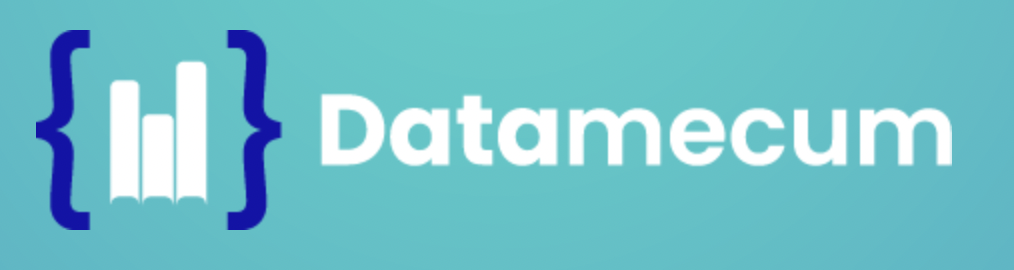
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Aprendizaje supervisado.</h2></font>
#### José María Martínez Martínez

# Entrenamiento personalizado
Esta guía usa *machine learning* para predecir la progresión de la diabetes después un año. Utiliza Scikit-Learn para:
1. Construir un modelo
2. Entrenar este modelo en datos de ejemplo
3. Encontrar la mejor combinación de parámetros
4. Usa el modelo para hacer predicciones en datos desconocidos



## Preparación del programa

### Configuración de los *imports*

Importa sklearn y los demás módulos de Python necesarios.

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

## Problema de regresión *Diabetes*

Este conjunto de datos contiene 10 variables descriptivas edad, sexo, índice de masa corporal, presión sanguínea promedio, y seis mediciones de suero sanguíneo tomadas para cada uno de los 442 pacientes con diabetes. Además, contiene la variable de interés a predecir, una medida cuantitavita de la progresión de la enferemedad un año después del inicio.

### Características del conjunto de datos


*   Número de instancias: 442
*   Número de atributos: Las 10 primeras columnas son valores predictivos numéricos

*   Variable objetivo: La columna 11 es una medida cuantitativa de la progresión de la enfermedad después de un año
*   Elemento de lista

### Información de los atributos:

       - age: edad en años
       - sex
       - bmi: índice de masa corporal
       - bp: presión arterial media
       - s1 tc, células T (un tipo de glóbulos blancos)
       - s2 ldl, lipoproteínas de baja densidad
       - s3 hdl, lipoproteínas de alta densidad
       - s4 tch, hormona estimulante de la tiroides
       - s5 ltg, lamotrigina
       - glu s6, nivel de azúcar en sangre


Nota: Cada una de estas 10 variables se ha centrado en la media y se ha escalado por la desviación estándar.




## Importación y preparación del conjunto de datos


### Carga del conjunto de datos

In [3]:
diabetes = datasets.load_diabetes()
features, labels = diabetes.data, diabetes.target

### Partición del conjunto de datos en Entrenamiento, Validación y Test

A continuación vamos a separar nuestro conjunto de datos en 2 conjuntos distintos (entrenamiento y test). Para ello utiliza el método `tain_test_split` de la librería *sklearn*. Para garantizar aleatoriedad en las particiones, mezcla de manera aleatoria las muestras. Para llevar a cabo las particiones, mantén un 85% de los datos para el conjunto de entrenamiento y un 15% para el de test.

In [4]:
 x_train, x_test, y_train, y_test= train_test_split(features,
                                                    labels,
                                                    test_size=0.15,
                                                    shuffle=True,
                                                    stratify=None)

A continuación vamos a estandarizar los datos. Como ya se ha comentado anteriormente, no sería necesarario ya que los datos ya vienen estandarizados al cargarlos. No obstante, a modo de ejercicio, estandariza los datos manualmente, sin ayuda de librerías externas siguiendo la siguiente fórmula:

$$x_{norm}=\frac{x-\mu}{\sigma}$$

Dónde $\mu$ es la media y $\sigma$ las desviación estandar.

In [13]:
x_train_norm = (x_train - np.mean(x_train, 0))/np.std(x_train, 0)
x_test_norm = (x_test-np.mean(x_train, 0))/np.std(x_train, 0)

y_train_norm =(y_train-np.mean(y_train,0))/np.std(y_train,0)
y_test_norm = (y_test-np.mean(y_train,0))/np.std(y_train,0)

Ahora utiliza la función `StandardScaler` del módulo `sklearn.preprocessing` para hecer el mismo escalado (media cero y desviación estándar 1) y compara que los resultados son los mismos:


In [21]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_scaler.fit(x_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train.reshape(-1,1))

y_train_scaled = y_scaler.transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

print(np.array_equal(x_train_norm, x_train_scaled))
print(np.array_equal(x_test_norm, x_test_scaled))

print(np.array_equal(y_train_norm.reshape(-1,1), y_train_scaled))
print(np.array_equal(y_test_norm.reshape(-1,1), y_test_scaled))


True
True
True
True


## Creación y entrenamiento del Modelo Neuronal


En este apartado vamos a crear y entrenar un Perceptron Multicapa. A continuación crea dicho modelo neuronal utilizando el módulo `neural_network` de la librearía `sklearn`. ¿Qué tipo de red escogerías? Crea un modelo con una capa oculta y entrénalo. No te preocupes por el número de neuronas, vamos a ir jugando para ver como varían los resultados en función de este parámetro.

In [24]:
from sklearn.neural_network import MLPRegressor
y_train_scaled_ = y_train_scaled.reshape(-1,)
model = MLPRegressor(random_state=1, hidden_layer_sizes=(100,100), activation='relu', solver= 'sgd', learning_rate_init=0.01, shuffle=True, max_iter=20000).fit(x_train_scaled, y_train_scaled_)


## Evaluación del Modelo Neuronal


A continuación, vamos a evaluar el modelo anterior. Para ello, vamos a hacer inferencia sobre el modelo. Es decir, vamos a predecir el resultado de las muestras de test usando el modelo creado y entrenado anteriormente. Una vez calculada la salida para dichas muestras, vamos a contrastar el resultado del modelo con la respuesta real.


Representa en un gráfico de barras el resultado del modelo vs el resultado real:

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

y_test_scaled_ = y_test_scaled.reshape(-1,)
y_pred =  model.predict(x_test_scaled)
df_temp = pd.DataFrame({'Actual': y_test_scaled_, 'Predicted': y_pred})
df_temp.plot(kind='bar', figsize=(20,12))
plot.show()


NameError: ignored

Imprime por pantalla el "Mean Absolute Error",  el "Mean Squared Error" y el "Root Mean Squared Error" usando el módulo `metrics` de la librería `sklearn`:


In [28]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_scaled, y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test_scaled, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))

Mean Absolute Error:  0.7669977872151413
Mean Square Error:  0.8841927269476791
Root Mean Square Error:  0.9403152274358206


A continuación muestra la curva del "Loss" que almacena el modelo como atributo:

In [32]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

A continuación pon un número de iteraciones para entrenar la red igual a 20000 y vuelve a ejecutar las celdas anteriores (entrenamieno de la red, cálculo de errores y visualización del loss). ¿Podrías explicar por qué en el eje x no se llega a 20000 iteraciones?

A continuación, realiza los mismos pasos que antes pero utililiza la opción de `early_stopping` ¿encuentras alguna diferencia? ¿Se obtienen mejores resultados? ¿Se realizan las mismas iteraciones de entrenamiento? ¿A qué se deben estos resultados?

In [33]:
from sklearn.neural_network import MLPRegressor
y_train_scaled_ = y_train_scaled.reshape(-1,)
model = MLPRegressor(random_state=1, early_stopping=True, hidden_layer_sizes=(100,100), activation='relu', solver= 'sgd', learning_rate_init=0.01, shuffle=True, max_iter=20000).fit(x_train_scaled, y_train_scaled_)


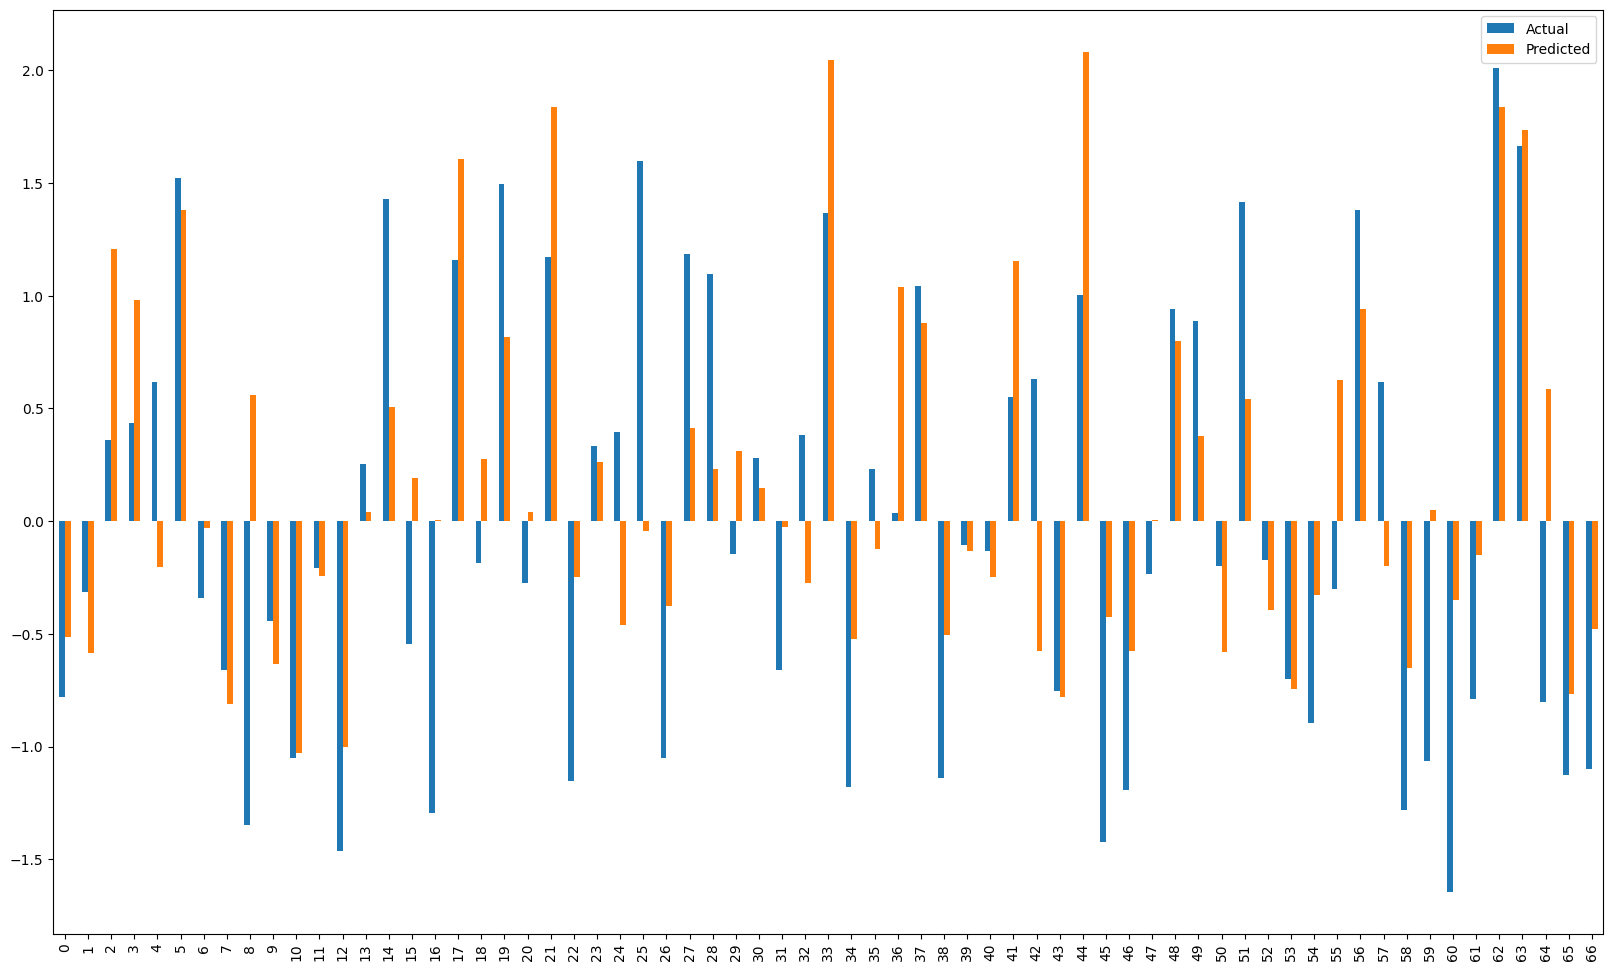

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

y_test_scaled_ = y_test_scaled.reshape(-1,)
y_pred =  model.predict(x_test_scaled)
df_temp = pd.DataFrame({'Actual': y_test_scaled_, 'Predicted': y_pred})
df_temp.plot(kind='bar', figsize=(20,12))
plt.show()

In [36]:
# Aquí cálculo de los errores:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_scaled, y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test_scaled, y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))

Mean Absolute Error:  0.5819592730163173
Mean Square Error:  0.5056940140514701
Root Mean Square Error:  0.7111216591072657


In [37]:
# Aquí Visualización de la curva loss
plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


## Selección de los mejores parámetros


Utiliza el módulo `GridSearchCV` de `sklearn.model_selection` realizar un entrenamiento para cada combinación de parámetros que se describen a continuación y así encontrar el mejor modelo (la mejor combinación de parámetros). Para ello:


*   Varía los tamaños de las 2 capas ocultas entre 50 y 500 con incrementos de 100 teniendo en cuenta todas las combinaciones posibles
*   Prueba las funciones de activación 'logistic', 'tanh', 'relu'
*   Prueba todos los optimizadores posibles
*   Prueba un learning rate inicial constante que vaya de 0.001 a 0.01 (teniendo en cuenta solo 5 valores)
*   Deja el resto de parámetros constantes (`early_stopping` y `shuffle` igual a `True`)

Una vez acabado el entrenamiento (ten en cuenta que puede tardar un buen rato), imprime por pantalla la mejor combinación de parámetros y el mejor score.



In [42]:
from sklearn.model_selection import GridSearchCV

model = MLPRegressor(random_state=1, early_stopping= True, shuffle=True, max_iter=20000)

param_dist = {
    "hidden_layer_sizes":[(i,j) for i in range(100, 500, 100) for j in range(100, 500, 100)],
    "activation": [ 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam'],
    "learning_rate_init": np.linspace(0.001, 0.01, 5),
    #"early_stopping": [True],
    #"shuffle": [True]
}

grid_search  = GridSearchCV(estimator=model, param_grid=param_dist, cv=3, n_jobs= -1)
grid_search .fit(x_train_scaled, y_train_norm)

# Print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))

# Print the best score
print("Best score: {:.2f}".format(grid_search.best_score_))


KeyboardInterrupt: ignored

Grid Search hace un barrido de todos los parámetros para probar todas las combinaciones posibles y entrenar todos los modelos. Como has podido comprobar, el finalizar el entrenamiento lleva mucho tiempo debido a su coste computacional. Por lot tanto, ahora vamos a utilizar la estrategia Random Search. Para ello, utiliza los mismos parámetros que en el ejercicio anterior:

In [43]:

from sklearn.model_selection import RandomizedSearchCV

model = MLPRegressor(random_state=1, early_stopping= True, shuffle=True, max_iter=20000)

param_dist = {
    "hidden_layer_sizes":[(i,j) for i in range(100, 500, 100) for j in range(100, 500, 100)],
    "activation": [ 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam'],
    "learning_rate_init": np.linspace(0.001, 0.01, 5),
    #"early_stopping": [True],
    #"shuffle": [True]
}
random_search  = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_jobs= -1)
random_search .fit(x_train_scaled, y_train_norm)

# Print the best parameters
print("Best parameters: {}".format(random_search.best_params_))

# Print the best score
print("Best score: {:.2f}".format(random_search.best_score_))

Best parameters: {'solver': 'sgd', 'learning_rate_init': 0.007750000000000001, 'hidden_layer_sizes': (200, 300), 'activation': 'tanh'}
Best score: 0.51


Ahora haz un ajuste fino dado los mejores parámetros. Deja los valores discretos fijos, y ajusta en rangos más pequeños los numéricos para tener un ajuste más fino del modelo. Imprime por pantalla la mejor combinación de parámetros y el mejor score.

In [44]:
from sklearn.model_selection import RandomizedSearchCV

model = MLPRegressor(random_state=1, early_stopping= True, shuffle=True, max_iter=20000)

param_dist = {
    "hidden_layer_sizes":[(i,j) for i in range(175, 225, 10) for j in range(275, 325, 10)],
    "activation": ['tanh'],
    "solver": ['adam'],
    "learning_rate_init": np.linspace(0.006, 0.08, 5),
    #"early_stopping": [True],
    #"shuffle": [True]
}
random_search  = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_jobs= -1)
random_search .fit(x_train_scaled, y_train_norm)

# Print the best parameters
print("Best parameters: {}".format(random_search.best_params_))

# Print the best score
print("Best score: {:.2f}".format(random_search.best_score_))


Best parameters: {'solver': 'adam', 'learning_rate_init': 0.006, 'hidden_layer_sizes': (195, 305), 'activation': 'tanh'}
Best score: 0.48


A continuación usa el mejor modelo y predice sobre el conjunto de test para imprimir por pantalla el "Mean Absolute Error",  el "Mean Squared Error" y el "Root Mean Squared Error" usando el módulo `metrics` de la librería `sklearn` sobre el conjunto de test ¿El error de test es menor o mayor que el visto hasta ahora?¿A qué se debe?

In [45]:
y_test_scaled = y_test_scaled. reshape(-1,)
random_search_predictions = random_search.predict(x_test_scaled)

best_model = random_search.best_estimator_
best_model_predictions = best_model.predict(x_test_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, random_search_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, random_search_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, random_search_predictions)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, best_model_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, best_model_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, best_model_predictions)))


Mean Absolute Error: 0.5861727059915175
Mean Squared Error: 0.5266374062351031
Root Mean Squared Error: 0.7256978753138962
Mean Absolute Error: 0.5861727059915175
Mean Squared Error: 0.5266374062351031
Root Mean Squared Error: 0.7256978753138962


A continuación muestra los resultados guardados en el atributo `cv_results`

In [47]:
results = pd.DataFrame(random_search.cv_results_)
print(results)
results.head()

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0       0.712782      0.038542         0.005334        0.000231         adam   
1       1.104030      0.535807         0.004831        0.000170         adam   
2       0.816437      0.122045         0.004980        0.000140         adam   
3       0.736601      0.158313         0.008960        0.002680         adam   
4       1.331635      0.323435         0.009461        0.003421         adam   
5       1.080822      0.575807         0.006082        0.001913         adam   
6       0.567389      0.125948         0.005136        0.000636         adam   
7       0.388244      0.015687         0.004826        0.000293         adam   
8       0.837225      0.030306         0.005298        0.000114         adam   
9       0.507637      0.105021         0.004387        0.000873         adam   

  param_learning_rate_init param_hidden_layer_sizes param_activation  \
0                   0.0245               (185, 

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0       0.712782      0.038542         0.005334        0.000231         adam   
1       1.104030      0.535807         0.004831        0.000170         adam   
2       0.816437      0.122045         0.004980        0.000140         adam   
3       0.736601      0.158313         0.008960        0.002680         adam   
4       1.331635      0.323435         0.009461        0.003421         adam   

  param_learning_rate_init param_hidden_layer_sizes param_activation  \
0                   0.0245               (185, 305)             tanh   
1                     0.08               (195, 315)             tanh   
2                   0.0615               (215, 315)             tanh   
3                   0.0245               (215, 315)             tanh   
4                   0.0615               (175, 315)             tanh   

                                              params  split0_test_score  \
0  {'solver': 'adam', 'learning_rate_init': 0.024...           0.359812   
1  {'solver': 'adam', 'learning_rate_init': 0.08,...           0.217650   
2  {'solver': 'adam', 'learning_rate_init': 0.061...           0.139621   
3  {'solver': 'adam', 'learning_rate_init': 0.024...           0.349265   
4  {'solver': 'adam', 'learning_rate_init': 0.061...          -0.149182   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.394593           0.494534         0.416313        0.057104   
1          -0.814164           0.109211        -0.162435        0.462964   
2           0.304196           0.227886         0.223901        0.067246   
3           0.264182           0.456571         0.356673        0.078717   
4           0.026304          -0.050844        -0.057907        0.071816   

   rank_test_score  
0                3  
1               10  
2                6  
3                4  
4                8